In [232]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Cross-Validation models.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

In [233]:
#importação dos dados
dados_deputados = pd.read_csv("eleicoes_2006_a_2010.csv")
dados_deputados.head(2)

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
0,2006,10001,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.0,2766.666667,NaN,...,14,14,16583.60,1184.542857,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,8579
1,2006,10002,LOIVA DE OLIVEIRA,RO,PT,13,13,22826.0,1755.846154,6625.0,...,24,23,20325.99,883.738696,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,2757


In [234]:
dados_deputados_2014 = pd.read_csv("eleicoes_2014.csv")
dados_deputados_2014.head(2)

,ano,sq_candidato,nome_candidato,sigla_uf,sigla_partido,qtd_doacoes,qtd_doadores,total_receita,media_receita,recursos de outros candidatos/comitês,...,qtd_despesas,qtd_fornecedores,total_despesa,media_despesa,descricao_cargo,sexo,grau_instrucao,estado_civil,descricao_ocupacao,votos
0,2014,10000000135,EMERSON DA SILVA SANTOS,AC,PSOL,3,3,1580.0,526.666667,NaN,...,3,3,1580.00,526.666667,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),"CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES",37
1,2014,10000000142,GERALDO SILVA DOS SANTOS,AC,PSOL,5,5,3180.0,636.000000,NaN,...,6,5,3130.02,626.004000,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),VIGILANTE,383


# Tratamento dos dados
Foram identificadas as colunas que possuem valores NaN para substituição dos valores para que a linha não seja descartada ocasionando a perca de dados.

In [235]:
#tratar dados faltantes
faltantes = dados_deputados.isnull().sum()
faltantes2 = dados_deputados_2014.isnull().sum()
print(faltantes2)

ano                                         0
sq_candidato                                0
nome_candidato                              0
sigla_uf                                    0
sigla_partido                               0
qtd_doacoes                                 0
qtd_doadores                                0
total_receita                               0
media_receita                               0
recursos de outros candidatos/comitês    1745
recursos de pessoas físicas              1209
recursos de pessoas jurídicas            3222
recursos próprios                        2076
qtd_despesas                                0
qtd_fornecedores                            0
total_despesa                               0
media_despesa                               0
descricao_cargo                             0
sexo                                        0
grau_instrucao                              0
estado_civil                                0
descricao_ocupacao                

In [236]:
#substituindo dados Nan por média da coluna
dados_deputados['total_receita'].fillna(dados_deputados['total_receita'].mean(), inplace = True)
dados_deputados['media_receita'].fillna(dados_deputados['media_receita'].mean(), inplace = True)
dados_deputados['recursos_de_outros_candidatos/comites'].fillna(dados_deputados['recursos_de_outros_candidatos/comites'].mean(), inplace = True)
dados_deputados['recursos_de_pessoas_fisicas'].fillna(dados_deputados['recursos_de_pessoas_fisicas'].mean(), inplace = True)
dados_deputados['recursos_de_pessoas_juridicas'].fillna(dados_deputados['recursos_de_pessoas_juridicas'].mean(), inplace = True)
dados_deputados['recursos_proprios'].fillna(dados_deputados['recursos_proprios'].mean(), inplace = True)

In [237]:
dados_deputados_2014['recursos de outros candidatos/comitês'].fillna(dados_deputados_2014['recursos de outros candidatos/comitês'].mean(), inplace = True)
dados_deputados_2014['recursos de pessoas físicas'].fillna(dados_deputados_2014['recursos de pessoas físicas'].mean(), inplace = True)
dados_deputados_2014['recursos de pessoas jurídicas'].fillna(dados_deputados_2014['recursos de pessoas jurídicas'].mean(), inplace = True)
dados_deputados_2014['recursos próprios'].fillna(dados_deputados_2014['recursos próprios'].mean(), inplace = True)

In [238]:
#dados_deputados.info()

#dados_deputados_2014.head(2)

In [239]:
#normalização dos dados
normalizador = StandardScaler()

dados_deputados[['quantidade_doacoes', 'quantidade_doadores', 'total_receita', 'media_receita', 'recursos_de_outros_candidatos/comites', 'recursos_de_pessoas_fisicas', 'recursos_de_pessoas_juridicas', 'recursos_proprios', 'quantidade_despesas', 'quantidade_fornecedores', 'total_despesa', 'media_despesa']] = normalizador.fit_transform(dados_deputados[['quantidade_doacoes', 'quantidade_doadores', 'total_receita', 'media_receita', 'recursos_de_outros_candidatos/comites', 'recursos_de_pessoas_fisicas', 'recursos_de_pessoas_juridicas', 'recursos_proprios', 'quantidade_despesas', 'quantidade_fornecedores', 'total_despesa','media_despesa']])


In [240]:
#normalização dos dados de 2014
normalizador_2014 = StandardScaler()

dados_deputados_2014[['qtd_doacoes', 'qtd_doadores', 'total_receita', 'media_receita', 'recursos de outros candidatos/comitês', 'recursos de pessoas físicas', 'recursos de pessoas jurídicas', 'recursos próprios', 'qtd_despesas', 'qtd_fornecedores', 'total_despesa', 'media_despesa']] = normalizador_2014.fit_transform(dados_deputados_2014[['qtd_doacoes', 'qtd_doadores', 'total_receita', 'media_receita', 'recursos de outros candidatos/comitês', 'recursos de pessoas físicas', 'recursos de pessoas jurídicas', 'recursos próprios', 'qtd_despesas', 'qtd_fornecedores', 'total_despesa', 'media_despesa']])

In [241]:
dados_deputados_2014.head(2)

,ano,sq_candidato,nome_candidato,sigla_uf,sigla_partido,qtd_doacoes,qtd_doadores,total_receita,media_receita,recursos de outros candidatos/comitês,...,qtd_despesas,qtd_fornecedores,total_despesa,media_despesa,descricao_cargo,sexo,grau_instrucao,estado_civil,descricao_ocupacao,votos
0,2014,10000000135,EMERSON DA SILVA SANTOS,AC,PSOL,-0.436410,-0.445564,-0.372149,-0.393603,7.944267e-17,...,-0.329191,-0.328385,-0.367700,-0.436052,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),"CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES",37
1,2014,10000000142,GERALDO SILVA DOS SANTOS,AC,PSOL,-0.396391,-0.396645,-0.369157,-0.385930,7.944267e-17,...,-0.322390,-0.322629,-0.364901,-0.383142,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),VIGILANTE,383


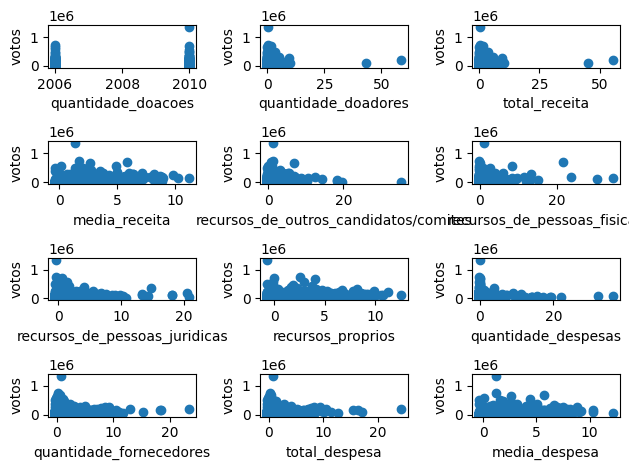

In [242]:
#valores de X e Y

dados_selecao = pd.DataFrame(dados_deputados, columns=['ano','quantidade_doacoes', 'quantidade_doadores', 'total_receita', 'media_receita',\
                 'recursos_de_outros_candidatos/comites', 'recursos_de_pessoas_fisicas', 'recursos_de_pessoas_juridicas', \
                'recursos_proprios', 'quantidade_despesas', 'quantidade_fornecedores', 'total_despesa', \
                 'media_despesa', 'votos'])
dados_selecao.head()


X = dados_selecao.drop('votos', axis=1).values
Y = dados_selecao['votos'].values

fig, ax = plt.subplots(4, 3)
ax[0,0].scatter(X[:,0],Y);
ax[0,0].set_xlabel('quantidade_doacoes');
ax[0,0].set_ylabel('votos');

ax[0,1].scatter(X[:,1],Y);
ax[0,1].set_xlabel('quantidade_doadores');
ax[0,1].set_ylabel('votos');

ax[0,2].scatter(X[:,2],Y);
ax[0,2].set_xlabel('total_receita');
ax[0,2].set_ylabel('votos');

ax[1,0].scatter(X[:,3],Y);
ax[1,0].set_xlabel('media_receita');
ax[1,0].set_ylabel('votos');

ax[1,1].scatter(X[:,4],Y);
ax[1,1].set_xlabel('recursos_de_outros_candidatos/comites');
ax[1,1].set_ylabel('votos');

ax[1,2].scatter(X[:,5],Y);
ax[1,2].set_xlabel('recursos_de_pessoas_fisicas');
ax[1,2].set_ylabel('votos');

ax[2,0].scatter(X[:,6],Y);
ax[2,0].set_xlabel('recursos_de_pessoas_juridicas');
ax[2,0].set_ylabel('votos');

ax[2,1].scatter(X[:,7],Y);
ax[2,1].set_xlabel('recursos_proprios');
ax[2,1].set_ylabel('votos');

ax[2,2].scatter(X[:,8],Y);
ax[2,2].set_xlabel('quantidade_despesas');
ax[2,2].set_ylabel('votos');

ax[3,0].scatter(X[:,9],Y);
ax[3,0].set_xlabel('quantidade_fornecedores');
ax[3,0].set_ylabel('votos');

ax[3,1].scatter(X[:,10],Y);
ax[3,1].set_xlabel('total_despesa');
ax[3,1].set_ylabel('votos');

ax[3,2].scatter(X[:,11],Y);
ax[3,2].set_xlabel('media_despesa');
ax[3,2].set_ylabel('votos');

plt.tight_layout();

In [243]:
dados_selecao_2014 = pd.DataFrame(dados_deputados_2014, columns=['ano','qtd_doacoes', 'qtd_doadores', 'total_receita', 'media_receita',\
                 'recursos de outros candidatos/comitês', 'recursos de pessoas físicas', 'recursos de pessoas jurídicas', \
                'recursos próprios', 'qtd_despesas', 'qtd_fornecedores', 'total_despesa', \
                 'media_despesa', 'votos'])
dados_selecao_2014.head()

,ano,qtd_doacoes,qtd_doadores,total_receita,media_receita,recursos de outros candidatos/comitês,recursos de pessoas físicas,recursos de pessoas jurídicas,recursos próprios,qtd_despesas,qtd_fornecedores,total_despesa,media_despesa,votos
0,2014,-0.436410,-0.445564,-0.372149,-0.393603,7.944267e-17,-0.417037,0.000000,-5.438875e-17,-0.329191,-0.328385,-0.367700,-0.436052,37
1,2014,-0.396391,-0.396645,-0.369157,-0.385930,7.944267e-17,-0.400078,0.000000,-5.438875e-17,-0.322390,-0.322629,-0.364901,-0.383142,383
2,2014,0.303954,0.410510,0.248269,0.184985,-3.447678e-01,0.263433,-0.197507,5.339987e-01,-0.007274,0.063068,0.219829,0.535947,26448
3,2014,0.083846,0.190377,-0.081985,-0.051298,6.139286e-02,0.296120,-0.744527,-2.747123e-01,-0.027677,0.011258,0.064762,0.344354,9896
4,2014,2.705137,3.052109,0.954866,-0.088752,-2.565797e-01,3.245770,0.292327,2.574188e-01,0.838324,0.681909,0.654269,0.137141,20876


In [244]:
#dados de seleção de 2014
xdados_selecao_2014 = dados_selecao_2014.drop('votos', axis=1).values
ydados_selecao_2014 = dados_selecao_2014['votos'].values

In [245]:
#dados de treino e teste
dados_selecao_treino = dados_selecao.loc[dados_selecao['ano'] == 2006]
dados_selecao_teste = dados_selecao.loc[dados_selecao['ano'] == 2010]


In [246]:
#dados seleção 2006 + 2010
dados_selecao_2006_2010 = dados_selecao.drop('votos', axis=1)
ydados_selecao_2006_2010 = dados_selecao['votos'].values

In [247]:
xTreino = dados_selecao_treino.drop('votos', axis=1).values
yTreino = dados_selecao_treino['votos'].values

xTeste = dados_selecao_teste.drop('votos', axis=1).values
yTeste = dados_selecao_teste['votos'].values

# Modelo Ridge

In [248]:
#modelo Ridge
modelo_ridge = Ridge(alpha=0.5)
modelo_ridge.fit(xTreino,yTreino)
score = modelo_ridge.score(xTreino,yTreino)
score

0.5214744752992242

In [249]:
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 60, 70]
scores = []
rmses = []

In [250]:
for i in range(len(alphas)):
    modelo_ridge2 =Ridge(alpha=alphas[i])
    modelo_ridge2.fit(xTreino,yTreino)
    score = modelo_ridge2.score(xTreino,yTreino)
    scores.append(score)
    #rmse = np.sqrt(mean_squared_error(yTeste, y_pred))
    #rmses.append(rmse)

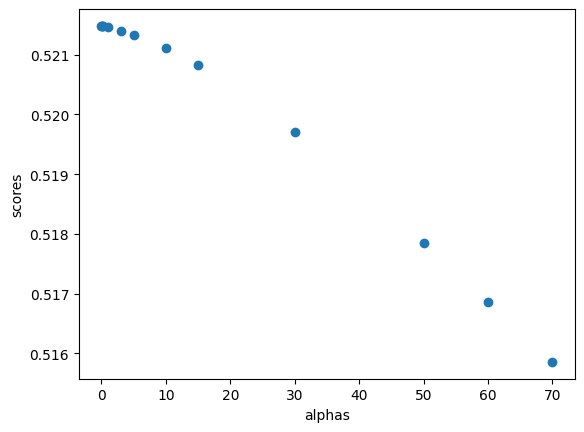

In [251]:
#plt.scatter(alphas,rmses);
#plt.xlabel('alphas');
#plt.ylabel('rmses');

plt.scatter(alphas,scores);
plt.xlabel('alphas');
plt.ylabel('scores');
#plt.scale('log');
#plt.xlim([le-5,10]);
#plt.ylim([0.8,0.822]);


In [252]:
modelo_ridge_final = Ridge(alpha=0.005)
modelo_ridge_final.fit(xTreino,yTreino)

predict_ridge = modelo_ridge_final.predict(xTeste)



residuo = yTeste - predict_ridge
np.sqrt(mean_squared_error(yTeste, predict_ridge))


61270.77128852481

### Validação Cruzada do Modelo Ridge
Não foi necessário a alteração do número de iterações para que o modelo convergir

In [253]:
validacao_cruzada_ridge = cross_val_predict(modelo_ridge_final, X, Y, cv=10)
np.sqrt(mean_squared_error(Y, validacao_cruzada_ridge))

45854.175496979326

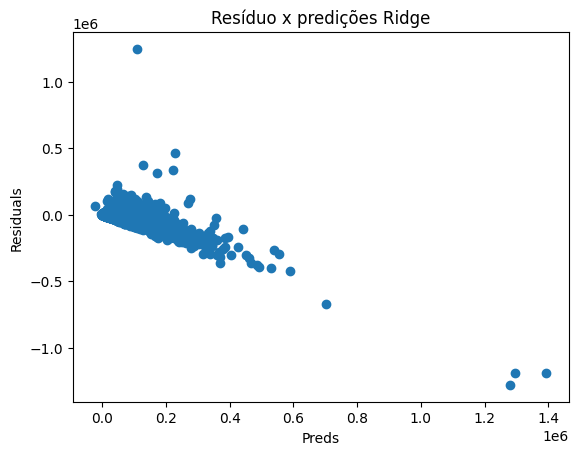

In [254]:
plt.scatter(predict_ridge,residuo);
plt.title("Resíduo x predições Ridge")
plt.xlabel('Preds');
plt.ylabel('Residuals');

In [255]:
#TREINANDO MODELO COM DADOS 2006 + 2010
modelo_ridge_final.fit(dados_selecao_2006_2010,ydados_selecao_2006_2010)
predict_ridgeGeral = modelo_ridge_final.predict(dados_selecao_2006_2010)

np.sqrt(mean_squared_error(ydados_selecao_2006_2010, predict_ridgeGeral))

36823.13284891955

In [256]:
#aplicando modelo aos dados de 2014
predict_ridgeGeral = modelo_ridge_final.predict(xdados_selecao_2014)

np.sqrt(mean_squared_error(ydados_selecao_2014, predict_ridgeGeral))

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


38715.10207022298

# Modelo Lasso

In [257]:
#Regressão lasso
modelo_lasso = Lasso(alpha=0.5, max_iter=3000)
modelo_lasso.fit(xTreino,yTreino)
score = modelo_lasso.score(xTreino,yTreino)
score

0.5214802970433914

In [258]:
alphas = [0.05, 0.5, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 60, 70]
scoresLasso = []

In [259]:
for i in range(len(alphas)):
    modelo_lasso2 = Lasso(alpha=alphas[i])
    modelo_lasso2.fit(xTreino,yTreino)
    score = modelo_lasso2.score(xTreino,yTreino)
    scoresLasso.append(score)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.161e+09, tolerance: 7.081e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.599e+09, tolerance: 7.081e+08
  model = cd_fast.enet_coordinate_descent(


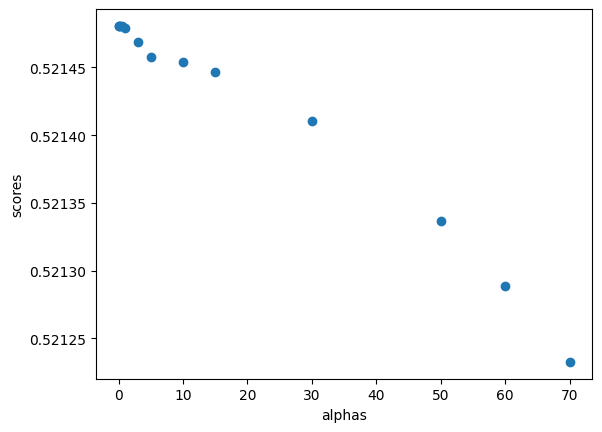

In [260]:
plt.scatter(alphas,scoresLasso);
plt.xlabel('alphas');
plt.ylabel('scores');

In [261]:
modelo_lasso_final = Lasso(alpha=0.5, max_iter=3000)
modelo_lasso_final.fit(xTreino,yTreino)
predict_lasso = modelo_lasso_final.predict(xTeste)

residual_lasso = yTeste - predict_lasso

np.sqrt(mean_squared_error(yTeste, predict_lasso))

61292.719660467745

### Validação Cruzada do modelo Lasso
Para que o modelo pudesse convergir o máximo de iterações foi definido em 3000 saindo do valor default de 1000 iderações

In [262]:
validacao_cruzada_lasso = cross_val_predict(modelo_lasso_final, X, Y, cv=10)
np.sqrt(mean_squared_error(Y, validacao_cruzada_lasso))

45853.00005358085

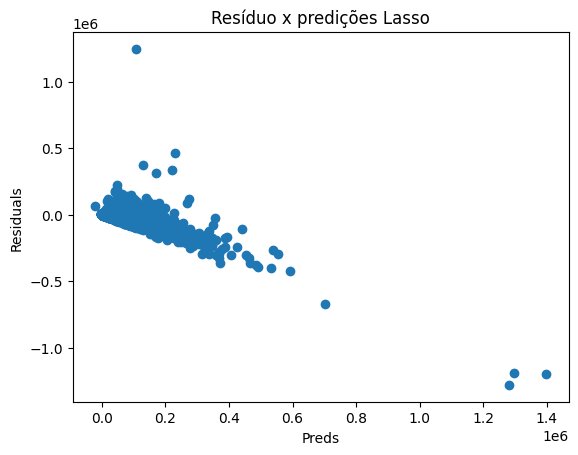

In [263]:
plt.scatter(predict_lasso,residual_lasso);
plt.title("Resíduo x predições Lasso")
plt.xlabel('Preds');
plt.ylabel('Residuals');

In [264]:
#TREINANDO MODELO COM DADOS 2006 + 2010
modelo_lasso_final.fit(dados_selecao_2006_2010,ydados_selecao_2006_2010)
predict_lasso_geral = modelo_lasso_final.predict(dados_selecao_2006_2010)

np.sqrt(mean_squared_error(ydados_selecao_2006_2010, predict_lasso_geral))

36823.13608873924

In [265]:
#aplicando modelo aos dados de 2014
predict_lasso_geral = modelo_lasso_final.predict(xdados_selecao_2014)

np.sqrt(mean_squared_error(ydados_selecao_2014, predict_lasso_geral))

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


38713.729274649035

# Modelo Random Forests

In [296]:
#Modelo com Random Forest

arvores = RandomForestRegressor(random_state=0)
arvores.fit(xTreino,yTreino)
predict_random = arvores.predict(xTeste)

residuo_random = yTeste - predict_random

np.sqrt(mean_squared_error(yTeste, predict_random))

41562.63620297488

### Validação Cruzada do Modelo Random Forest

In [297]:
validacao_cruzada_RF = cross_val_predict(arvores, X, Y, cv=10)
np.sqrt(mean_squared_error(Y, validacao_cruzada_RF))

36212.72085113088

O Plot abaixo trás os residuos do modelo Random Forest, podemos observar que o gráfico indica uma relação linear entre os valores de x e y dos resíduos sendo estes aleatórios entre cada ponto no gráfico indicando assim uma variância constante. Mediante estes fatores podemos inferir uma boa adequabilidade do modelo ao problema. 


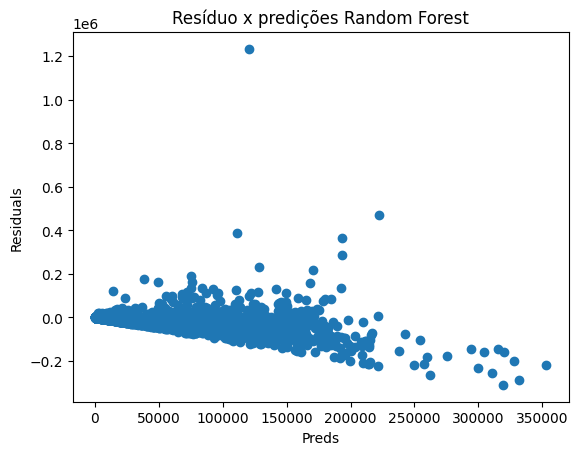

In [298]:
plt.scatter(predict_random,residuo_random);
plt.title("Resíduo x predições Random Forest")
plt.xlabel('Preds');
plt.ylabel('Residuals');

In [269]:
#TREINANDO MODELO COM DADOS 2006 + 2010
arvores.fit(dados_selecao_2006_2010,ydados_selecao_2006_2010)
predict_random = arvores.predict(dados_selecao_2006_2010)

np.sqrt(mean_squared_error(ydados_selecao_2006_2010, predict_random))

13852.836697034834

In [270]:
#aplicando modelo aos dados de 2014
predict_random = modelo_lasso_final.predict(xdados_selecao_2014)

np.sqrt(mean_squared_error(ydados_selecao_2014, predict_random))

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


38713.729274649035

## Modelo Decision Tree

In [300]:
#Modelo com Decision Tree
modeloDecisionTree = DecisionTreeRegressor(random_state=0)
modeloDecisionTree.fit(xTreino,yTreino)
predictDecisionTree = modeloDecisionTree.predict(xTeste)

residual_DT = yTeste - predictDecisionTree

np.sqrt(mean_squared_error(yTeste, predictDecisionTree))



52771.94532021264

### Validação Cruzada do Modelo Decision Tree

In [301]:
validacao_cruzada_DT = cross_val_predict(modeloDecisionTree, X, Y, cv=10)
np.sqrt(mean_squared_error(Y, validacao_cruzada_DT))

50941.199321176566

O Plot para o modelo Decision Tree, podemos observar que o gráfico indica uma relação linear entre os valores de x e y dos resíduos sendo estes aleatórios entre cada ponto no gráfico, entretando alguns valores de do eixo X as predictions se concentraram não seguindo a linearidade demonstrada no gráfico, como são em dados pontuais, mesmo assim em contexto geral os dados seguem uma aleatoriedade e linearidade esperadas para garantia que o modelo tem uma boa adequabilidade ao problema. 

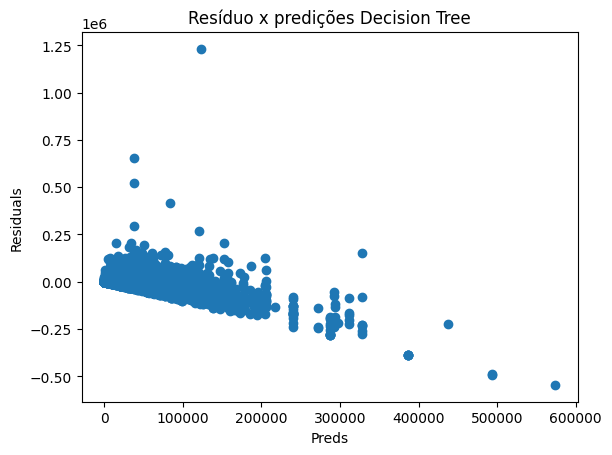

In [302]:
plt.scatter(predictDecisionTree,residual_DT);
plt.title("Resíduo x predições Decision Tree")
plt.xlabel('Preds');
plt.ylabel('Residuals');

In [274]:
#TREINANDO MODELO COM DADOS 2006 + 2010
modeloDecisionTree.fit(dados_selecao_2006_2010,ydados_selecao_2006_2010)
predictDecisionTree = modeloDecisionTree.predict(dados_selecao_2006_2010)

np.sqrt(mean_squared_error(ydados_selecao_2006_2010, predictDecisionTree))

144.6774842442133

In [275]:
#aplicando modelo aos dados de 2014
predictDecisionTree = modeloDecisionTree.predict(xdados_selecao_2014)

np.sqrt(mean_squared_error(ydados_selecao_2014, predictDecisionTree))

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


198165.93380740186

## KNN

In [276]:
modeloKnn = KNeighborsRegressor(n_neighbors=1)
modeloKnn.fit(xTreino,yTreino)
predictKnn = modeloKnn.predict(xTeste)

resitualKnn = yTeste - predictKnn

np.sqrt(mean_squared_error(yTeste, predictKnn))

55658.60513282114

### Validação Cruzada do Modelo KNN

In [277]:
validacao_cruzada_Knn = cross_val_predict(modeloKnn, X, Y, cv=10)
np.sqrt(mean_squared_error(Y, validacao_cruzada_Knn))

47514.81632292855

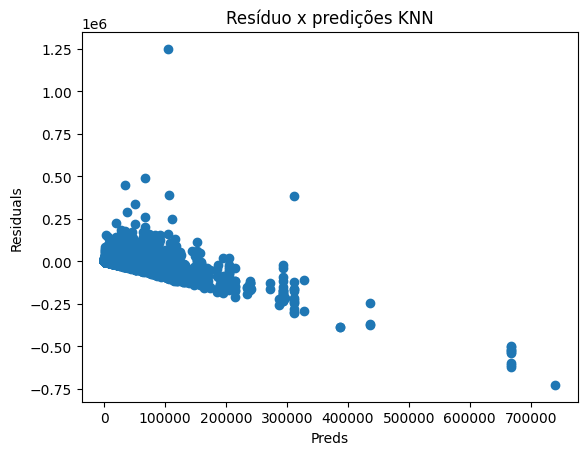

In [278]:
plt.scatter(predictKnn,resitualKnn);
plt.title("Resíduo x predições KNN")
plt.xlabel('Preds');
plt.ylabel('Residuals');

In [279]:
#TREINANDO MODELO COM DADOS 2006 + 2010
modeloKnn.fit(dados_selecao_2006_2010,ydados_selecao_2006_2010)
predictKnn = modeloKnn.predict(dados_selecao_2006_2010)

np.sqrt(mean_squared_error(ydados_selecao_2006_2010, predictKnn))

223.84002277986403

In [280]:
#aplicando modelo aos dados de 2014
predictKnn = modeloKnn.predict(xdados_selecao_2014)

np.sqrt(mean_squared_error(ydados_selecao_2014, predictKnn))

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


49596.677737383776

## SVR

In [286]:
modeloSVR = SVR(kernel='rbf')
modeloSVR.fit(xTreino,yTreino)
predictSVR = modeloSVR.predict(xTeste)

residualSVR = yTeste - predictSVR

np.sqrt(mean_squared_error(yTeste, predictSVR))

53486.20180515505

### Validação Cruzada do Modelo SVR

In [287]:
validacao_cruzada_SVR = cross_val_predict(modeloSVR, X, Y, cv=10)
np.sqrt(mean_squared_error(Y, validacao_cruzada_SVR))

52021.03203348497

O Plot para análise da boa adequabilidade do modelo ao problema analisádo entre os resíduos e a variância para o modelo SVR demonstra que os valores indicam que os dados são aleatorios e lineares, diferente dos outros modelos os valores residuais do modelo SVR retornou somente valores > 0.

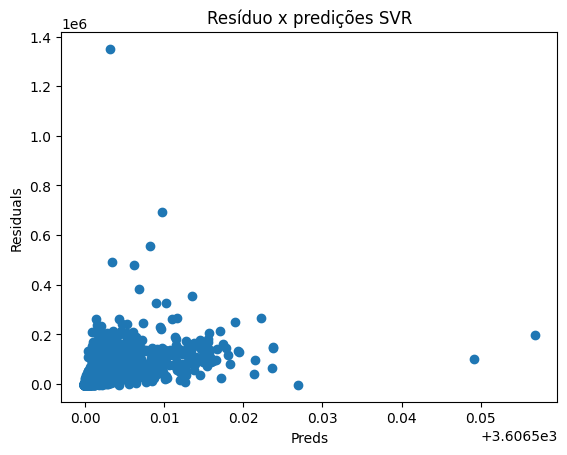

In [294]:
plt.scatter(predictSVR,residualSVR);
plt.title("Resíduo x predições SVR")
plt.xlabel('Preds');
plt.ylabel('Residuals');

In [284]:
#TREINANDO MODELO COM DADOS 2006 + 2010
modeloSVR.fit(dados_selecao_2006_2010,ydados_selecao_2006_2010)
predictSVR = modeloSVR.predict(dados_selecao_2006_2010)

np.sqrt(mean_squared_error(ydados_selecao_2006_2010, predictSVR))

52006.89045700436

In [285]:
#aplicando modelo aos dados de 2014
predictSVR = modeloSVR.predict(xdados_selecao_2014)

np.sqrt(mean_squared_error(ydados_selecao_2014, predictSVR))

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


48712.03371543074

# Melhor Modelo